## 0. Introduction

The purpose of this notebook is to explore Seasonal Autoregressive Integrated Moving Average $(\text{SARIMA}$) models with reference to chapter 5 from *Applied Time Series Analysis and Forecasting with Python* (Huang \& Petukhina, 2022).

## 1. SARIMA Models

Suppose that we have a nonstationary time series $\{X_t\}$ with trend and seasonal period $s$. If the differenced series

$$ Y_t = \nabla^d \, \nabla_s^D X_t = (1 - B)^d (1 - B^s)^D X_t $$

is stationary, then we can consider the problem of finding an appropriate model for $\{Y_t\}$.

As we know, we use an $\text{ARMA}$ model to characterize the ordinary correlation of a time series, and $\text{ARMA}$ models are of $\varphi(B)Y_t = \theta(B)\varepsilon_t$, which reminds us that we could use such a form of $\varPhi(B^s)Y_t = \varTheta(B^s)\varepsilon_t$ to model seasonal correlation. If a time series has both ordinary correlation and seasonal correlation, then we should combine $\varphi(B)Y_t = \theta(B)\varepsilon_t$ and $\varPhi(B^s)Y_t = \varTheta(B^s)\varepsilon_t$ together in order to model these two types of correlation. This leads to the following definition.

If $d$ and $D$ are nonnegative integers and $B$ is the backshift operator, then time series $\{X_t\}$ is a $\text{SARIMA}(p, d, q)(P, D, Q)_s$ process with seasonal period $s$ if the differenced series $Y_t = (1 - B)^d (1 - B^s)^D X_t$ is stationary and $\{X_t\}$ satisfies the following model:

$$ \varphi(B) \varPhi(B^s) (1 - B)^d (1 - B^s)^D X_t = \theta(B) \varTheta(B^s) \varepsilon_t, \quad \varepsilon_t \sim \text{WN}(0, \sigma_\epsilon^2), \tag{1.1} $$

where $\varphi(z) = 1 - \varphi_1 z - \cdots - \varphi_p z^p$ ($\varphi_p \neq 0$) and $\theta(z) = 1 + \theta_1 z + \cdots + \theta_q z^q$ ($\theta_q \neq 0$), as we know, are, respectively, the $\text{AR}$ polynomial and $\text{MA}$ polynomial. $\varPhi(z) = 1 - \varPhi_1 z - \dots - \varPhi_P z^P$ ($\varPhi_P = 0$) and $\varTheta(z) = 1 + \Theta_1 z + \dots + \varTheta_Q z^Q$ ($\varTheta_Q = 0$) are, respectively, called the seasonal AR polynomial and seasonal MA polynomial. Besides, equation (1.1) itself is known as a $\text{SARIMA}(p, d, q)(P, D, Q)_s$ model where $Y_t = (1 - B)^d (1 - B^s)^D X_t$ is still required to be stationary.

> Just as both $\varphi(B)$ and $\theta(B)$ are for modeling ordinary correlation, both $\varPhi(B^s)$ and $\varTheta(B^s)$ are to model seasonal correlation.

> As in $\text{ARMA}$ modeling, we require that the resulting model $\text{SARMA}(p, q)(P, Q)_s$ for $Y_t = (1 - B)^d (1 - B^s)^D X_t$ is both causal and invertible. It can be proved that the resulting model is causal if and only if $\varphi(z) \neq 0$ and $\varPhi(z) \neq 0$ for any $|z| \leq 1$; it is invertible if and only if $\theta(z) \neq 0$ and $\varTheta(z) \neq 0$ for any $|z| \leq 1$.

> If $X_t$ is stationary, namely, $d = D = 0$, then model (1.1) is reduced to $\varphi(B) \varPhi(B^s) X_t = \theta(B) \varTheta(B^s) \varepsilon_t$, which is $\text{SARMA}(p, q)(P, Q)_s$ models.

> If $p = q = d = 0$, then model (1.1) is reduced to $\varPhi(B^s) (1 - B^s)^D X_t = \varTheta(B^s) \varepsilon_t$, which is called (pure) $\text{SARIMA}(P, D, Q)_s$ models.

> If $X_t$ is stationary, namely, $d = D = 0$ and $p = q = 0$, then model (1.1) is reduced to $\varPhi(B^s) X_t = \varTheta(B^s) \varepsilon_t$, which is known as (pure) $\text{SARMA}(P, Q)_s$ models. Furthermore, if $Q = 0$, $\text{SARMA}(P, Q)_s$ reduces to (pure) $\text{SAR}(P)_s$ and if $P = 0$, $\text{SARMA}(P, Q)_s$ reduces to (pure) $\text{SMA}(Q)_s$.

Given a $\text{SARMA}(1, 1)(1,1)_{12}$ model as follows

$$ X_t = 0.7 X_{t-1} + 0.5 \varepsilon_{t-1} - 0.3 X_{t-12} + 0.2 \varepsilon_{t-12} + \varepsilon_t$$

where $\varepsilon_t \sim \text{iidN}(0, 1)$, simulate a sample of size (length) 192 from the $\text{SARMA}(1, 1)(1,1)_{12}$ model, and then graph the time series.

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

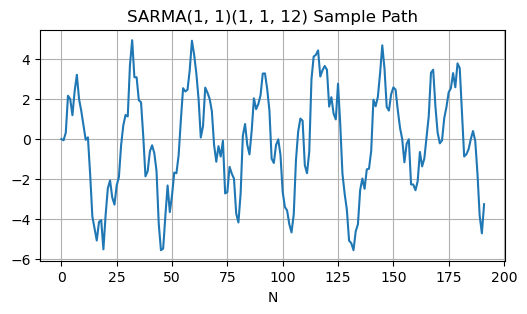

In [2]:
# Simulate a sample path from the SARMA(1, 1)(1, 1, 12) model given above
N = 192
X = np.zeros(N)
phi_1, theta_1 = 0.7, 0.5
phi_12, theta_12 = -0.3, 0.2
epsilon = ss.norm.rvs(loc=0, scale=1, size=N, random_state=42)
for t in range(1, N):
    X[t] = phi_1 * X[t-1] + theta_1 * epsilon[t-1] + phi_12 * X[t-12] + theta_12 * epsilon[t-12] + epsilon[t]
    
# Plot the sample path
plt.figure(figsize=(6,3))
plt.plot(X)
plt.title('SARMA(1, 1)(1, 1, 12) Sample Path')
plt.xlabel('N')
plt.grid(True)
plt.show()